In [13]:
# RUN THIS CELL ONLY ONCE 
# in order to instull the necessary packages

import os
os.system('pip install biopython')
os.system('pip install pandas')
os.system('pip install numpy')

# If you use conda, uncomment the lines below
# os.system('conda install biopython')
# os.system('conda install pandas')
# os.system('conda install numpy')

0

In [2]:
# Libraries
import pandas as pd
import numpy as np
import itertools
from Bio import SeqIO
from bisect import bisect_left
import matplotlib.pyplot as plt

In [3]:
# SPECIFYING k value
k = 7

In [4]:
def BinarySearch(a, x): 
    i = bisect_left(a, x) 
    
    if i == len(a):
        return i-1
    elif a[i] == x or i == 0: 
        return i 
    else:
        a1 = abs(a[i-1] - x)
        a2 = abs(a[i] - x)

        return i-1 if a1 < a2 else i

In [5]:
# Checking wheter a given number is prime
def is_prime(n):
    if n == 2 or n == 3: return True
    if n < 2 or n%2 == 0: return False
    if n < 9: return True
    if n%3 == 0: return False
    r = int(n**0.5)
    # since all primes > 3 are of the form 6n ± 1
    # start with f=5 (which is prime)
    # and test f, f+2 for being prime
    # then loop by 6. 
    f = 5
    while f <= r:
        print('\t',f)
        if n % f == 0: return False
        if n % (f+2) == 0: return False
        f += 6
    return True

In [6]:
# Returns the first n primes in a list
def getprimes(n):

    primes = [2]
    num = 3
    while len(primes) < n:
        if is_prime(num):
            primes.append(num)
        num += 2
    
    return primes

In [7]:
# Converts a k-mer to godel number

def kmerToGodel(kmer, primes):
    g = 0
    #g = Decimal('0')
    for i in range(len(kmer)):
        nucleotide = kmer[i]
        # Have to change this
        if nucleotide == 'a':
            g += 1*np.log(primes[i], dtype = np.longdouble)
            #g += 1*Decimal(primes[i]).log10()
        elif nucleotide == 'c':
            g += 2*np.log(primes[i], dtype = np.longdouble)
            #g += 2*Decimal(primes[i]).log10()
        elif nucleotide == 'g':
            g += 3*np.log(primes[i], dtype = np.longdouble)
            #g += 3*Decimal(primes[i]).log10()
        elif nucleotide == 't':
            g += 4*np.log(primes[i], dtype = np.longdouble)
            #g += 4*Decimal(primes[i]).log10()
        else:
            g = 0
            break
    
    return g

In [8]:
# Converts a dna sequence to a godel signal

def seqToGodelSignal(seq, primes):
    gs = []
    kmers = []
    k = len(primes)
    for i in range(len(seq)-k+1):
        this_kmer = seq[i:i+k]
        gs += [kmerToGodel(this_kmer, primes)]
        kmers += [str(this_kmer)]
    
    return gs, kmers

In [9]:
def foo(l,k):
     yield from itertools.product(*([l] * k))
     return

In [10]:
def produce_all_godels_of_current_kvalue(k, primes):

    l = ['a', 'c', 'g', 't']
    godels = []
    dict_of_kmers = []
    for x in foo('acgt', k):
        dict_of_kmers.append(''.join(x))
        godels.append(kmerToGodel(x,primes))
    
    
    dict_of_kmers = [x for _,x in sorted(zip(godels,dict_of_kmers))]
    godels.sort()
    
    return godels, dict_of_kmers

In [11]:
# Importing sequences
mypath = 'input/sars_1000.fasta'

# Parameters
data = []
with open(mypath, "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        data.append(record)


In [12]:
# Here we produce all possible godel numbers of a fixed value

# Bring the first k primes
primes = getprimes(k)

# Calculate all godel numbers for a fixed value k
# MORE INFO:
# godels_k: a sorted list of all godel numbers for a fixed value k
# dict_of_kmers: a list that contains all k-mers for a fixed value of k. The list is sorted in a way
# that matches the godels_k sorting, which means that the i-th element in godels_k list (godels_k[i])
# is the godel number that matches to the i-th k-mer (dict_of_kmers[i])

godels_k, dict_of_kmers = produce_all_godels_of_current_kvalue(k, primes)

# If you want to find out which k-mer represents a given godel number g, use BinarySearch function as follows:
# this_index = BinarySearch(godels_k, g)
# kmer = dict_of_kmers[this_index]



In [13]:
# data contains 1000 sequences
# here we take only the 1st one
seq1 = data[1].seq
gs1, kmers1 = seqToGodelSignal(seq1, primes)


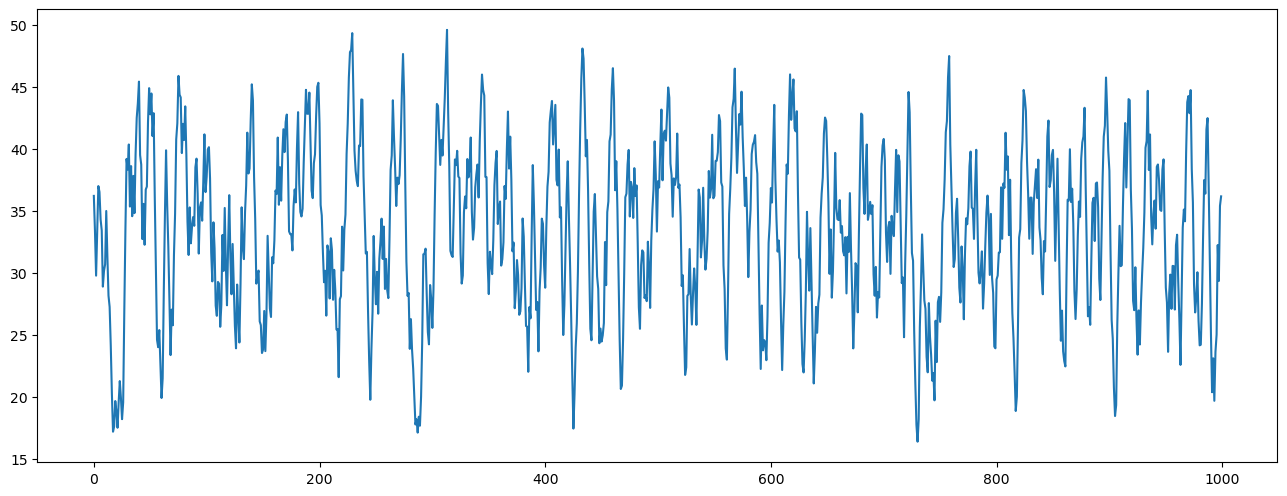

In [14]:
# Plotting the godel signal
plt.figure(num=None, figsize=(16, 6), dpi=100, facecolor='w', edgecolor='k')
plt.plot(gs1[:1000])
plt.show()

In [38]:
# good luck with your work :)